In [26]:
import os
import json
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
# ! Specify result dir
RESULT_DIR = 'exp_output/2023-11-24-02_41_54'
DATASET = 'office_home'
SELECT_GPT4V_SUCCESS = True
SELECT_LLAVA_SUCCESS = True

In [27]:
def show_img(img_path):
    if os.path.exists(img_path):
        img = imread(img_path)

        fig = plt.figure()
        fig.set_dpi(100)

        plt.imshow(img)
        plt.axis('off')
        plt.show()


def read_and_reformat_jsonl(file_path):
    reformatted_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            record = json.loads(line)
            image_key = record.pop('image')
            reformatted_data[image_key] = record
    return reformatted_data


def randomize_dict(input_dict):
    items = list(input_dict.items())  # Convert dict items to a list
    random.shuffle(items)  # Shuffle the list
    randomized_dict = dict(items)  # Convert back to a dictionary
    return randomized_dict

In [28]:
output_llava_path = f'../{RESULT_DIR}/unified_output_llava-v1.5-13b.jsonl'
output_gpt4v_path = f'../{RESULT_DIR}/random_1/{DATASET}/unified_output_gpt-4-vision-preview.jsonl'
output_gpt4v = read_and_reformat_jsonl(output_gpt4v_path)
output_llava = read_and_reformat_jsonl(output_llava_path)

gpt-4v output:
{'dataset': 'office_home', 'domain': 'Product', 'subject': 'nature', 'true_class': 'File_Cabinet', 'predicted_class': 'Shelf', 'confidence_score': '0.95', 'reasoning': 'The image shows a structure that resembles a shelf component, specifically a box shelf or cube shelf with a label holder on it. It is not fully assembled and includes a separate flat piece likely intended to be one of the sides or the back panel. It is designed for storage. The confidence is not 1.0 because without additional context, there could be some uncertainty whether this represents a specific type of shelf or storage unit such as a file cabinet.\n---END FORMAT TEMPLATE---', 'id': '3'}
llava output:
{'dataset': 'office_home', 'domain': 'Product', 'subject': 'nature', 'true_class': 'File_Cabinet', 'predicted_class': 'File_Cabinet', 'id': '1413', 'confidence_score': '0.9', 'reasoning': 'The image shows a black file cabinet with a clear plastic window on the front.'}


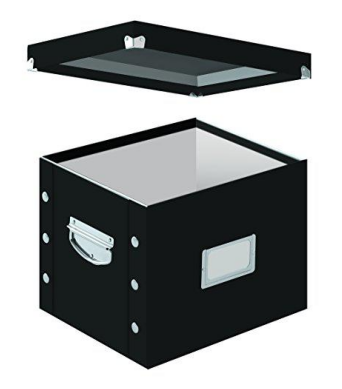

In [29]:
output_gpt4v = randomize_dict(output_gpt4v)
for img, val in output_gpt4v.items():
    gpt4v_success_flag = val['true_class'] == val['predicted_class']
    llava_success_flag = output_llava[img]['predicted_class'] is not None and output_llava[img]['true_class'] == output_llava[img]['predicted_class']
    if gpt4v_success_flag == SELECT_GPT4V_SUCCESS and llava_success_flag == SELECT_LLAVA_SUCCESS:
        print(f'gpt-4v output:\n{val}')
        print(f'llava output:\n{output_llava[img]}')
        show_img(f'../{RESULT_DIR}/random_1/{DATASET}/{img}')
        break